# Abhiek Bist

I am intrested in determining the corelation between airquality and temperature

# Loading Data

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

AirQuality = pd.read_csv("../data/raw/AirQuality.csv",sep=";")

AirQuality.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
5,10/03/2004,23.00.00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848",NaN,NaN
6,11/03/2004,00.00.00,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603",NaN,NaN
7,11/03/2004,01.00.00,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702",NaN,NaN
8,11/03/2004,02.00.00,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648",NaN,NaN
9,11/03/2004,03.00.00,"0,6",1010.0,19.0,"1,7",561.0,-200.0,1705.0,-200.0,1235.0,501.0,"10,3","60,2","0,7517",NaN,NaN


In [48]:
## CLEANING 

col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

r=list(np.arange(len(col)))

#Na_values=-100
AirQuality=pd.read_csv('../data/raw/AirQuality.csv',sep=";",header=None,skiprows=1,names=col,na_filter=True,
                   na_values=-100,usecols=r)

#droping end rows with NaN values
AirQuality.dropna(how='all',inplace=True)

AirQuality['DATE']=pd.to_datetime(AirQuality.DATE, format='%d/%m/%Y')
AirQuality['MONTH']= AirQuality['DATE'].dt.month  
AirQuality['CO_GT']=AirQuality['CO_GT'].astype(str).replace(",",".",regex=True).astype(float)
AirQuality['T'] = AirQuality['T'].astype(str).replace(",",".",regex=True).astype(float)
AirQuality['RH'] = AirQuality['RH'].astype(str).replace(",",".",regex=True).astype(float)
AirQuality['AH'] = AirQuality['AH'].astype(str).replace(",",".",regex=True).astype(float)
AirQuality['C6H6_GT'] = AirQuality['C6H6_GT'].astype(str).replace(",",".",regex=True).astype(float)
AirQuality['HOUR']=AirQuality['TIME'].apply(lambda x: int(x.split('.')[0]))

AirQuality.head(10)


,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,MONTH,HOUR
0,2004-03-10,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3,18
1,2004-03-10,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3,19
2,2004-03-10,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3,20
3,2004-03-10,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3,21
4,2004-03-10,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3,22
5,2004-03-10,23.00.00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,3,23
6,2004-03-11,00.00.00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,3,0
7,2004-03-11,01.00.00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,3,1
8,2004-03-11,02.00.00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,3,2
9,2004-03-11,03.00.00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517,3,3


# EDA

In [41]:
print(AirQuality.shape)

(9357, 15)


In [43]:
AirQuality.max(axis=0)

DATE            2005-04-04 00:00:00
TIME                       23.00.00
CO_GT                          11.9
PT08_S1_CO                   2040.0
NMHC_GT                      1189.0
C6H6_GT                        63.7
PT08_S2_NMHC                 2214.0
NOX_GT                       1479.0
PT08_S3_NOX                  2683.0
NO2_GT                        340.0
PT08_S4_NO2                  2775.0
PT08_S5_O3                   2523.0
T                              44.6
RH                             88.7
AH                            2.231
MONTH                            12
HOUR                             23
dtype: object

In [44]:
AirQuality.min(axis=0)

DATE            2004-03-10 00:00:00
TIME                       00.00.00
CO_GT                        -200.0
PT08_S1_CO                   -200.0
NMHC_GT                      -200.0
C6H6_GT                      -200.0
PT08_S2_NMHC                 -200.0
NOX_GT                       -200.0
PT08_S3_NOX                  -200.0
NO2_GT                       -200.0
PT08_S4_NO2                  -200.0
PT08_S5_O3                   -200.0
T                            -200.0
RH                           -200.0
AH                           -200.0
MONTH                             1
HOUR                              0
dtype: object

Text(0.5, 1.0, 'co-relation between variables')

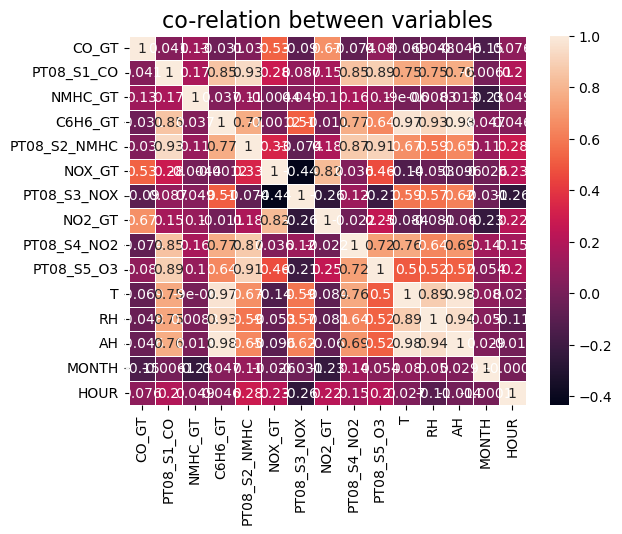

In [50]:
sns.heatmap(AirQuality.corr(),annot=True, linewidths=.4)
plt.title('co-relation between variables',fontsize=16)

In [54]:
AirQuality.corr()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,MONTH,HOUR
CO_GT,1.000000,0.041411,0.128351,-0.031378,0.029926,0.526451,-0.089981,0.671127,-0.073724,0.080310,-0.068939,-0.048227,-0.045892,-0.146075,0.075984
PT08_S1_CO,0.041411,1.000000,0.170007,0.852687,0.933102,0.277993,0.087019,0.154030,0.845149,0.892434,0.754844,0.745375,0.764903,-0.006105,0.196780
NMHC_GT,0.128351,0.170007,1.000000,0.037323,0.110104,-0.004427,0.048821,0.103307,0.162680,0.101185,-0.000009,0.008284,0.012500,-0.230206,0.049371
C6H6_GT,-0.031378,0.852687,0.037323,1.000000,0.767433,-0.001174,0.512193,-0.010992,0.774673,0.641334,0.971375,0.925062,0.984555,0.046754,0.046087
PT08_S2_NMHC,0.029926,0.933102,0.110104,0.767433,1.000000,0.331272,-0.073667,0.176488,0.874782,0.909905,0.669025,0.585803,0.646572,0.111403,0.282315
NOX_GT,0.526451,0.277993,-0.004427,-0.001174,0.331272,1.000000,-0.436084,0.817139,0.035546,0.461889,-0.138452,-0.053009,-0.095847,-0.026303,0.225153
PT08_S3_NOX,-0.089981,0.087019,0.048821,0.512193,-0.073667,-0.436084,1.000000,-0.256232,0.122734,-0.208865,0.588111,0.573549,0.621618,-0.031109,-0.256172
NO2_GT,0.671127,0.154030,0.103307,-0.010992,0.176488,0.817139,-0.256232,1.000000,-0.022174,0.253439,-0.084104,-0.081305,-0.060440,-0.232317,0.219483
PT08_S4_NO2,-0.073724,0.845149,0.162680,0.774673,0.874782,0.035546,0.122734,-0.022174,1.000000,0.723690,0.755060,0.640707,0.691913,0.141687,0.147978
PT08_S5_O3,0.080310,0.892434,0.101185,0.641334,0.909905,0.461889,-0.208865,0.253439,0.723690,1.000000,0.503700,0.524955,0.519467,0.053750,0.198014


In [ ]:
col1=AirQuality.columns.tolist()[2:]
for i in AirQuality.columns.tolist()[2:]:
    sns.lmplot(x=i,y='T',data=AirQuality,markers='.')